In [53]:
import pandas as pd
import os.path as op
from tqdm.contrib.itertools import product
import numpy as np
import seaborn as sns
from tms_risk.utils import get_subjects

In [54]:
def get_cvr2(subject, session, mask='npcr', bids_folder='/data/ds-tmsrisk'):
    subject = int(subject)

    fn = op.join(bids_folder, 'derivatives', 'decoded_pdfs.volume.cv_voxel_selection.denoise', f'sub-{subject:02d}',
    'func', f'sub-{subject:02d}_ses-{session}_mask-{mask}_space-T1w_r2s.tsv')

    if op.exists(fn):
        df = pd.read_csv(fn, sep='\t', index_col=[0,1,2,3])
        # print(df)
        df['mask'] = mask
        df = df.set_index('mask', append=True)
        print(df)
        return df
    else:
        return pd.DataFrame(np.zeros((0,0)))

In [55]:
subjects = [int(sub.subject) for sub in get_subjects(all_tms_conditions=True)]
# subjects.pop(subjects.index(24))

In [56]:
df = []
for subject, session in product(subjects, ['1', '2', '3']):
    try:
        d = get_cvr2(subject, session)
        d.columns.name = 'voxel'
        if len(d) != 0:
            df.append(d.stack().to_frame('r2'))
        # print(df[-1])
    except Exception as e:
        print(e)

df = pd.concat(df)

  0%|          | 0/105 [00:00<?, ?it/s]

                                                 0         1         2  \
subject session test_run1 test_run2 mask                                 
1       1       1         2         npcr -0.056757 -0.256720 -0.127478   
                          3         npcr -0.356946  0.062501 -0.121697   
                          4         npcr -0.013464  0.004762 -0.080695   
                          5         npcr -0.148937  0.029072 -0.087051   
                          6         npcr -0.022102 -0.029854 -0.143019   
                2         1         npcr -0.044467 -0.039182 -0.019620   
                          3         npcr -0.503673  0.077644  0.021552   
                          4         npcr -0.033799 -0.007844 -0.106595   
                          5         npcr -0.217806  0.047649 -0.038522   
                          6         npcr -0.012904 -0.037592 -0.101700   
                3         1         npcr -0.047332  0.003269 -0.085496   
                          2         np

In [57]:
prop_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).mean())
sum_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).sum())

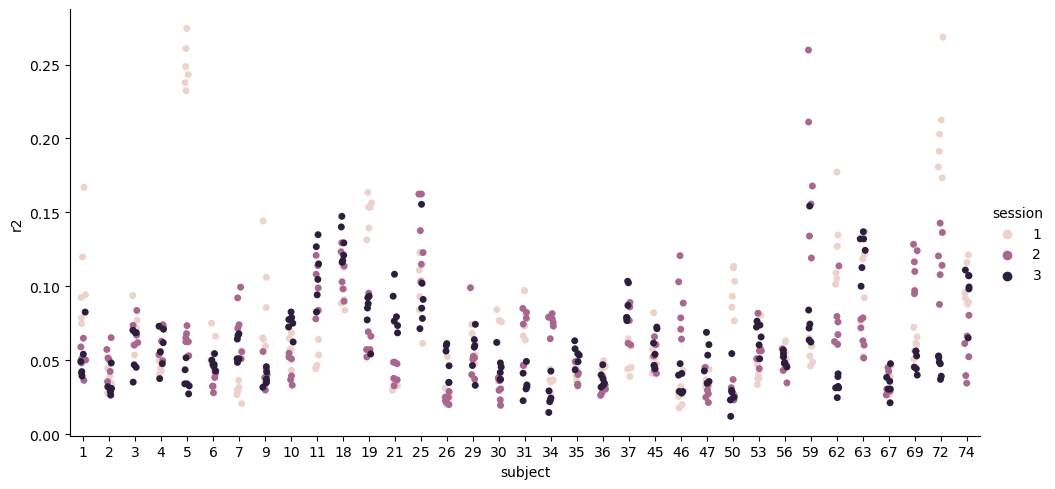

In [58]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0, aspect=2.)

In [59]:
prop_0.unstack('session').groupby('subject').mean().droplevel(0, axis=1)

session,1,2,3
subject,,,
1,0.104453,0.051572,0.051408
2,0.035088,0.050343,0.032799
3,0.071070,0.069398,0.055741
4,0.049308,0.061297,0.057751
5,0.249547,0.064085,0.037138
6,0.055147,0.035784,0.047794
7,0.029091,0.073939,0.058182
9,0.087442,0.041860,0.037674
10,0.058196,0.044473,0.074756


In [60]:
sum_0.groupby('session').describe()

r2                                                       
         count       mean        std   min    25%   50%    75%    max
session                                                              
1        209.0  66.645933  46.189815  16.0  34.00  48.0  82.00  254.0
2        210.0  58.166667  31.587137  16.0  36.25  50.0  72.75  192.0
3        210.0  53.895238  27.941129  12.0  33.25  47.0  68.75  157.0

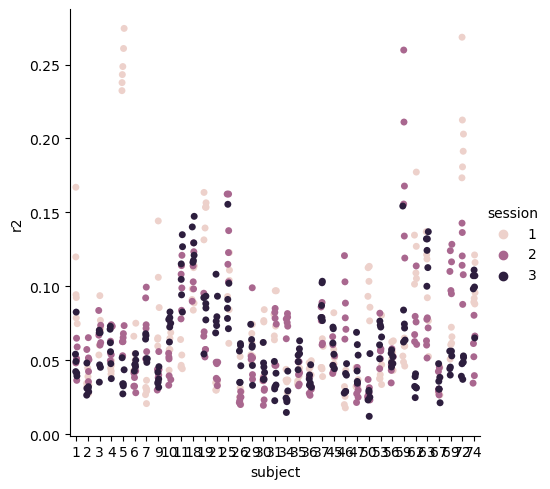

In [61]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0)

Text(33.403850308641964, 0.5, 'Optimal number of voxels according to CV2-r2')

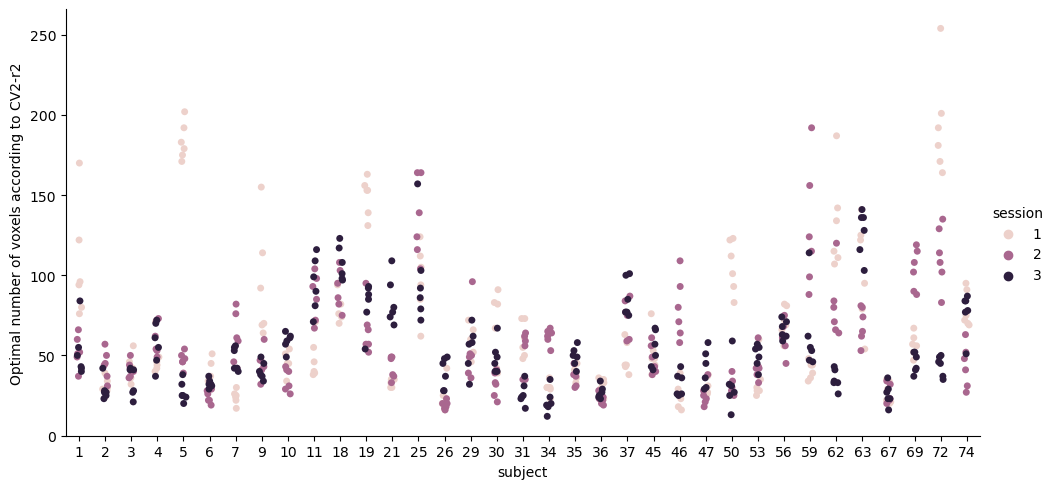

In [62]:
sns.catplot(x='subject', y='r2', hue='session', data=sum_0, aspect=2.)
plt.ylabel('Optimal number of voxels according to CV2-r2')

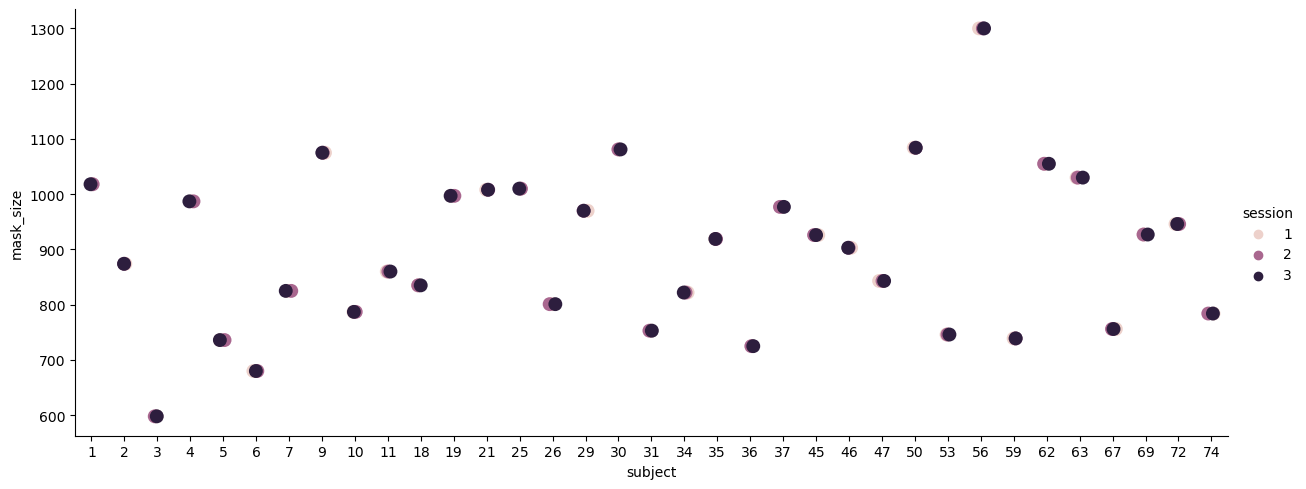

In [63]:
mask_size = df.groupby(['subject', 'session', 'voxel']).mean().groupby(['subject', 'session']).size()

sns.catplot(x='subject', y='mask_size', hue='session', data=mask_size.to_frame('mask_size'), aspect=2.5, size=10)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


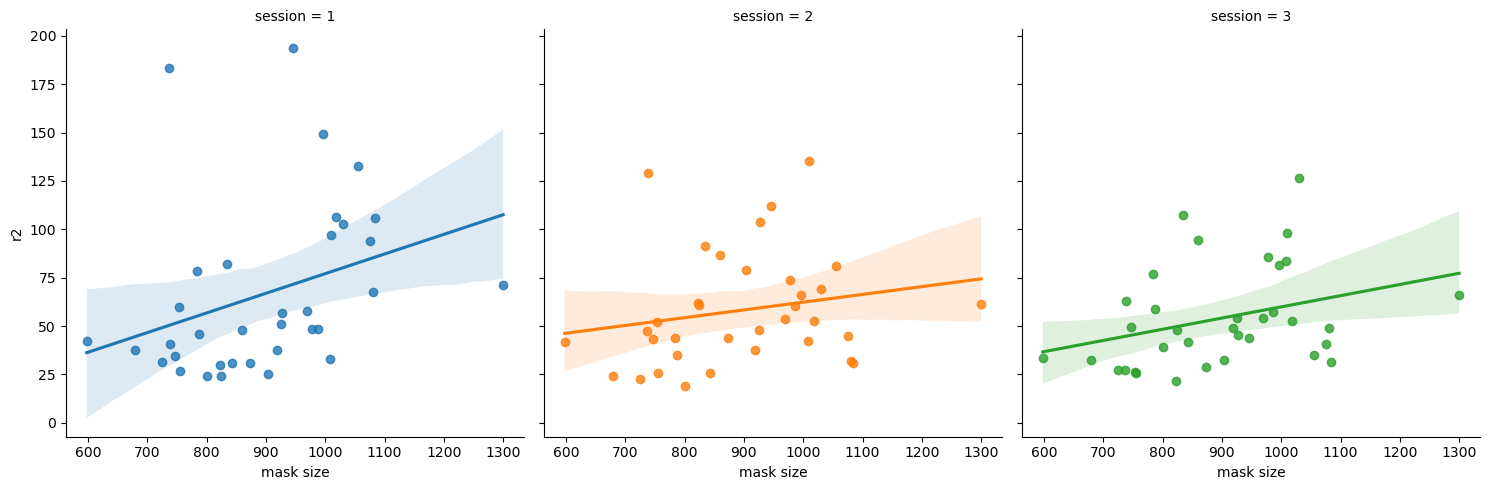

In [64]:
tmp = mask_size.to_frame('mask size').join(sum_0)

sns.lmplot(data=tmp.groupby(['subject', 'session']).mean().reset_index(), x='mask size', y='r2', hue='session', col='session', sharex=False)